<a href="https://colab.research.google.com/github/haidarqwm/scientific-computing-lab/blob/main/aol/aolHaidarQawama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving aol_data.csv to aol_data (1).csv
File "aol_data (1).csv" berhasil diunggah.
R-squared: 0.9958
Mean Squared Error: 79758.4210


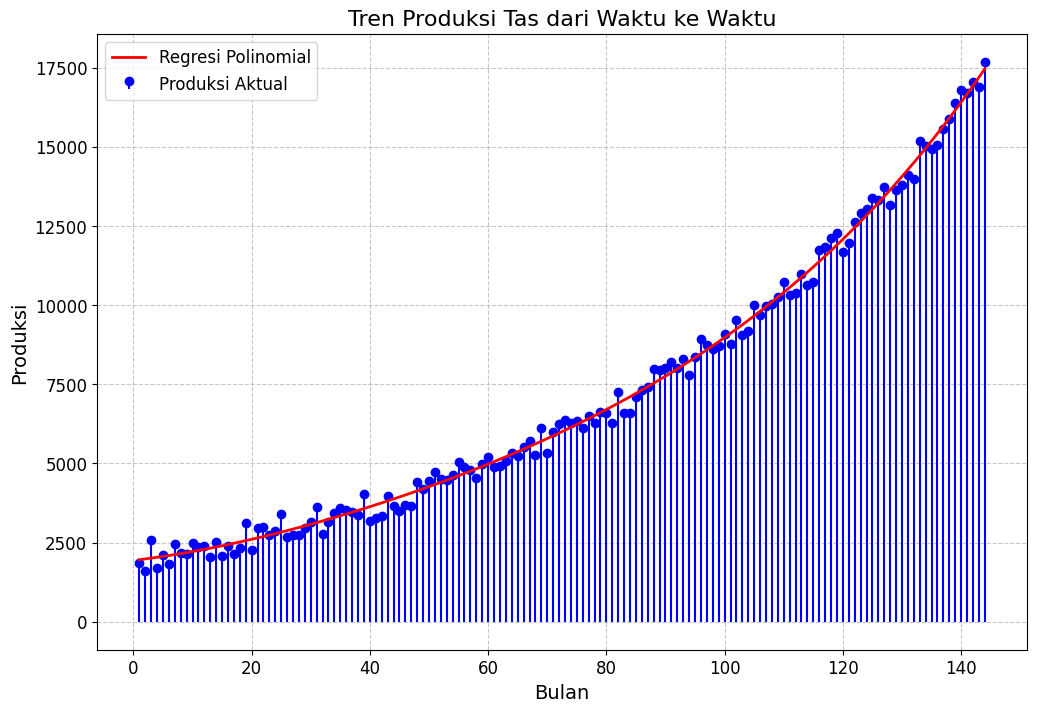

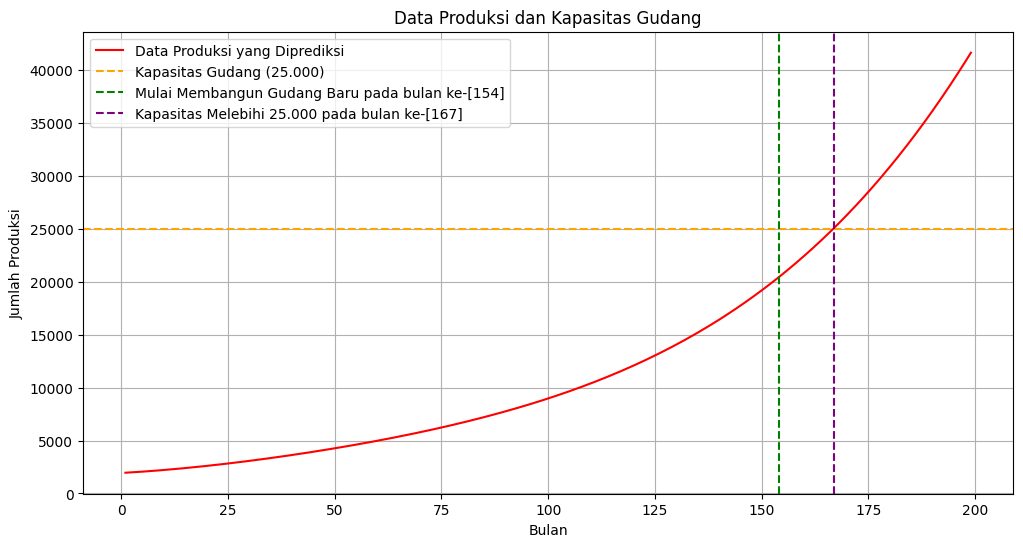

Produksi mencapai 25.000 pada bulan ke-[167] dengan jumlah prediksi sebesar 25095.04
EIGER perlu mulai membangun gudang baru pada bulan ke-[154]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from google.colab import files

# Unggah file Excel
uploaded = files.upload()

# Menampilkan nama file yang diunggah
for filename in uploaded.keys():
    print(f'File "{filename}" berhasil diunggah.')

# Menggunakan nama file yang diunggah
file_path = list(uploaded.keys())[0]
data = pd.read_excel(file_path)

# Asumsi kolom pertama adalah bulan dan kolom kedua adalah produksi
bulan = np.arange(1, 145).reshape(-1, 1)  # Membuat urutan bulan
produksi = data.values.flatten()  # Kolom kedua sebagai data produksi

# Mengubah data ke dalam bentuk fitur polinomial
poly = PolynomialFeatures(degree=4)
bulan_poly = poly.fit_transform(bulan.reshape(-1, 1))

# Membuat model regresi linier
model = LinearRegression()
model.fit(bulan_poly, produksi)

# Melakukan prediksi produksi menggunakan model regresi polinomial
produksi_pred = model.predict(bulan_poly)

# Hitung R-squared dan MSE
r2 = r2_score(produksi, produksi_pred)
mse = mean_squared_error(produksi, produksi_pred)

print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

# Plot data aktual dan model regresi polinomial
plt.figure(figsize=(12, 8))
plt.stem(bulan, produksi, linefmt='blue', markerfmt='bo', basefmt=' ', label='Produksi Aktual')
plt.plot(bulan, produksi_pred, 'r-', linewidth=2, label='Regresi Polinomial')
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Produksi', fontsize=14)
plt.title('Tren Produksi Tas dari Waktu ke Waktu', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Menyimpan koefisien polinomial dan intercept
coefficients = model.coef_
intercept = model.intercept_

# Fungsi polinomial untuk prediksi
def polynomial_model(x):
    return intercept + coefficients[1] * x + coefficients[2] * x**2 + coefficients[3] * x**3 + coefficients[4] * x**4

# Prediksi produksi masa depan hingga jumlah produksi mencapai 25.000
bulan_mendatang = np.arange(1, 200).reshape(-1, 1)
bulan_poly_mendatang = poly.fit_transform(bulan_mendatang)
produksi_mendatang = model.predict(bulan_poly_mendatang)

while produksi_mendatang[-1] < 25000:
      bulan_selanjutnya = bulan_mendatang[-1] + 1
      produksi_selanjutnya = polynomial_model(bulan_selanjutnya)
      bulan_mendatang = np.append(bulan_mendatang, bulan_selanjutnya)
      produksi_mendatang = np.append(produksi_mendatang, produksi_selanjutnya)

# Menemukan bulan di mana produksi mencapai atau melebihi 25.000
bulan_mencapai_25000 = None
for i in range(len(produksi_mendatang)):
    if produksi_mendatang[i] >= 25000:
        bulan_mencapai_25000 = bulan_mendatang[i]
        break

# Menemukan bulan di mana mulai mambangun gudang baru
bulan_mulai_membangun = bulan_mencapai_25000 - 13

# Plot data produksi yang diperpanjang
plt.figure(figsize=(12, 6))
plt.plot(bulan_mendatang, produksi_mendatang, 'r-', label='Data Produksi yang Diprediksi')
plt.axhline(y=25000, color='orange', linestyle='--', label='Kapasitas Gudang (25.000)')
plt.axvline(x=bulan_mulai_membangun, color='green', linestyle='--', label=f'Mulai Membangun Gudang Baru pada bulan ke-{bulan_mulai_membangun}')
plt.axvline(x=bulan_mencapai_25000, color='purple', linestyle='--', label=f'Kapasitas Melebihi 25.000 pada bulan ke-{bulan_mencapai_25000}')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Produksi')
plt.title('Data Produksi dan Kapasitas Gudang')
plt.legend()
plt.grid(True)
plt.show()

print(f'Produksi mencapai 25.000 pada bulan ke-{bulan_mencapai_25000} dengan jumlah prediksi sebesar {produksi_mendatang[i]:.2f}')
print(f'EIGER perlu mulai membangun gudang baru pada bulan ke-{bulan_mulai_membangun}')